# Classifying text using deep learning models (final assignment)

by Ali Fenwick

## Introduction
The following is a description of a sequence classification problem and design of a text-based classification model for a final assignment in Deep Learning. For this final assignment on applying convolutional neural networks (CNN) to make predictions on real-world data, I have developed and tested three different types of deep learning models to evaluate their performance on the popular IMDB dataset. 

## Dataset
The IMDB dataset is a dataset containing text-based reviews of movies. The dataset contains 50.000 reviews categorized as either positive or negative depending on the wording used. The dataset is split into an equal number of training and test data, both containing 25.000 reviews each. Each movie review is a variable sequence of words and the sentiment of each movie review must be classified. The dataset and pre-trained word embedding (Glove 6B) were retrieved from [Github](https://github.com/Yifeng-He/Sentiment-Analysis-using-Convolutional-Neural-Network). For convenience purposes, the IMDB dataset available on Keras was used instead (ready for use in neural networks), while the word embedding on Github was utilized in this analysis.

## Application of CNN in text sentiment analysis
In recent years, CNN have been successful applied to sequence classification problems such as text-based predictions (sentiment analysis). The basic task of sentiment analysis is to classify the polarity of a given text and to determine whether the opinions expressed are positive, negative or neutral. Using statistical methods, deep learning models can classify text based on their sentiment. Till recently recurrent neural networks (RNN) have been the dominant model in addressing such problems due to its ability to obtain contextual information.

In this assignment, I aim to test three different models to check which models show the best model performance. To ensure breadth in evaluating deep learning model application to this sequence classification problem, I will test:


1.   Fully connected (Dense) Neural Network
2.   Convolutional Neural Network
3.   Convolutional Neural Network + LMTS



# Coding Section

## Library and data preparation for the design of the Dense Neural Network

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


First, I will download the IMDB dataset available on Keras.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics


Then I will load the necessary libraries for this first model testing.

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  #set specific indices of results[i] to 1s
    return results

# vectorized training data
x_train = vectorize_sequences(train_data)
# vectorized test data
x_test = vectorize_sequences(test_data)

Next, I will create vectorized sequences by creating an all-zero matrix while setting specific indices of results[i] to 1s. This part of the code transforms the dataset into a binary vector space model. The vectorized data is then set for the training and test sets. 

In [11]:
# vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In this section, I will set the datatype of the predictor variables (y) in both training and test set to decimals (float32)

## Model Design of a Dense Neural Network

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Designing the model, the rectified linear activation function (relu) activation is used in the initial layer. The relu function is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. Relu overcomes the vanishing gradient problem, allowing models to learn faster and perform better. 

In the final layer, the sigmoid function is used to facilitate the classification problem as either positive or negative. As the sigmoid function evaluates within 0 to 1 range, values <0.5 will be classified as negative and values >0.5 classified as positive.

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model compile helps to decide which optimizer to use for the model. RMSprop or Adam are frequently used. In this case, I chose for RMSprop. As the classification problem is a binary classification (positive or negative), I used binary_crossentropy as the loss function. Accuracy of the model predictions is the performance metrics of this model.

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In this section, I set the areas for x and y validation.

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 42ms/step - loss: 0.5188 - accuracy: 0.7878 - val_loss: 0.3949 - val_accuracy: 0.8653
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3113 - accuracy: 0.8985 - val_loss: 0.3058 - val_accuracy: 0.8851
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2259 - accuracy: 0.9263 - val_loss: 0.2908 - val_accuracy: 0.8826
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1774 - accuracy: 0.9434 - val_loss: 0.2734 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1474 - accuracy: 0.9511 - val_loss: 0.2984 - val_accuracy: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1211 - accuracy: 0.9621 - val_loss: 0.2925 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1008 - accuracy: 0.9699 - val_loss: 0.3052 - val_accuracy: 0.8836
Epoch 8/20
30

The model is then run using the model.fit function. The model shows that it achieves 86.6% accuracy. Next I will visualize the data to evaluate the overall performance of the model.

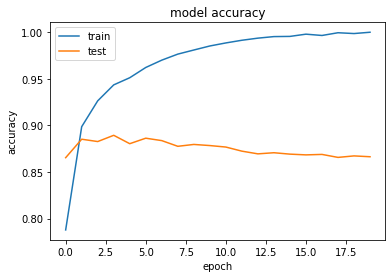

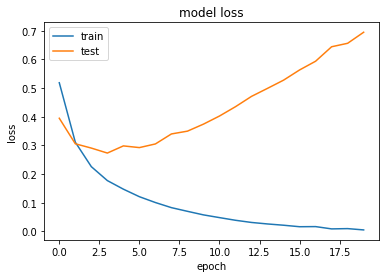

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

This part visualizes the loss and accuracy of the model. The illustrations show that the model is heavily overfitting. The accuracy of the training data accuracy is much higher than the validation accuracy which shows that the model is overfitting. Also the increase of loss of the validation data shows overfitting. 

It is important to fix this moving forward using regularization techniques such as L1/L2 regularization, Batch normalization, and Dropout.

# Text Classification with a Convolutional Neural Network


In this section, I will train a convolutional neural network to create a model which is more effective in terms of sentiment analysis text classification. In addition, I will also apply regurlarization techniques identified in the previous section. Not applying regularization to the CNN model showed poor results in previous attempts I had made.

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization

In addition to the previous libraries, I am loading here libraries related to regularization and CNN development. Also, I am applying the word embedding here which I forgot to apply in the previous section.

## Model Design of a Convolutional Neural Network 

In [42]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
batch_normalization_5 (Batch (None, 500, 32)           128       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 250, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 250)              

Similar to before, here I am developing the neural network model. The first layer design contains information about the CNN I am applying. I specifically chose here for a 1D filter, because I am analyzing text and not images. CNN require Maxpooling to reduce the dimensions of the feature map. Finally, for regularization batch normalization and dropout are added. 

In the model compile section, I have chosen Adam this time as it gave better results than the RSMprop optimizer. The model summary was added this time around to provide a summary of the model parameters. 

The results of the model show that the accuracy of the model is 87.97%. Improvement compared to the fully connected network previous tested. Let's now visually check the overall performance of the model for overfitting.

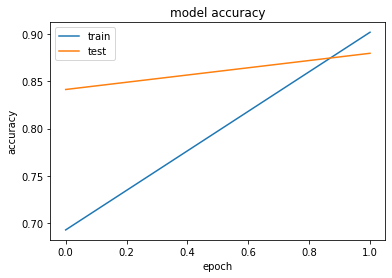

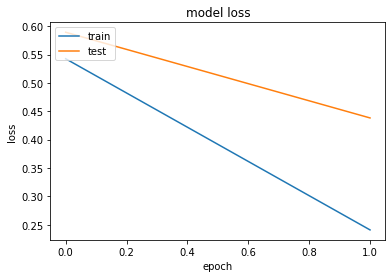

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

The visuals show that there is still overfitting. I will attempt to develop another neural network which includes a CNN together with a form of RNN: Long Short Term Memory (LSTM).

# Text Classification using CNN together with LSTM

In this section, I will train a convolutional neural network together with a LSTM to create a model which is even more effective in terms of sentiment analysis text classification. The CNN LSTM architecture involves using Convolutional Neural Network (CNN) layers for feature extraction on input data combined with LSTMs to support sequence prediction. Combining the advantages of convolutional neural networks (CNN) that can extract effective features from the data, and long short-term memory (LSTM) which can not only find the interdependence of data in time series data, but also automatically detect the best mode suitable for relevant data.

In [58]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.layers import GlobalMaxPooling1D
import tensorflow as tf
from tensorflow.keras.layers import LSTM

Loading of necessary libraries for the development of the CNN + LSTM. 

In [50]:
embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

The following code loads the GloVe word embeddings and creates a dictionary that will contain words as keys and their corresponding embedding list as values. I did not use this in the previous sections, as I was not able to get it embedded. Now it worked hence applying it here (in future considerations, I will apply it to other neural networks to evaluate its impact on the model's performance).



# Model Design for a CNN + LSTM

In [90]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(120))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 500, 32)           3104      
_________________________________________________________________
batch_normalization_12 (Batc (None, 500, 32)           128       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 250, 32)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)               73440     
_________________________________________________________________
dropout_9 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)               

Similar to before, I am now running the model using model.fit. I have tried various alternations of the model choosing different hyperparamters. I found that setting Dropout at 0.8 had a better impact on performance. Also RSMprop optimizer performed better than the Adam optimizer. Finally, I set the LSTM layer to 120 instead of 100 as it performed better as well at this value.

In [91]:
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
196/196 - 19s - loss: 0.4971 - accuracy: 0.7572 - val_loss: 0.6931 - val_accuracy: 0.5046
Epoch 2/5
196/196 - 15s - loss: 0.2989 - accuracy: 0.8854 - val_loss: 0.3518 - val_accuracy: 0.8702
Epoch 3/5
196/196 - 15s - loss: 0.2472 - accuracy: 0.9092 - val_loss: 0.3157 - val_accuracy: 0.8632
Epoch 4/5
196/196 - 15s - loss: 0.1899 - accuracy: 0.9323 - val_loss: 0.2824 - val_accuracy: 0.8896
Epoch 5/5
196/196 - 15s - loss: 0.1472 - accuracy: 0.9501 - val_loss: 0.3320 - val_accuracy: 0.8800
Accuracy: 88.00%


The model performance looks promising. The validation accuracy is 88%, slightly better than the previous CNN model. Let's check the visuals again.

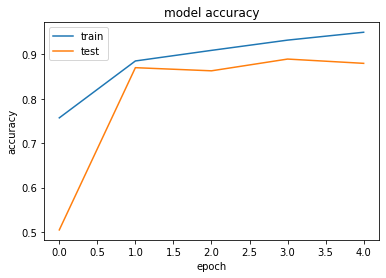

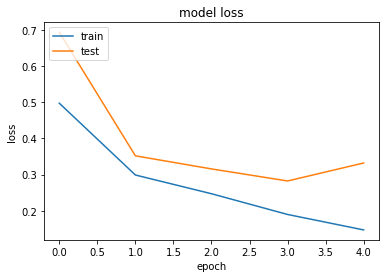

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

I am very happy with the performance of this model.  Slightly more conversion here. However, the model still overfits to some extent. In the next section, I will apply another regularization technique, namely L1/l2 regularization to see if minimizing dimensions / applying penalities can help resolve the overfitting issue.

# Model Design for a CNN + LSTM (L1/L2 regulariation applied)

In [137]:
from keras import regularizers

In [179]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(120))
model.add(Dropout(0.50))
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_54 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 500, 32)           3104      
_________________________________________________________________
batch_normalization_44 (Batc (None, 500, 32)           128       
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 250, 32)           0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 120)               73440     
_________________________________________________________________
dropout_37 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 64)              

As the core focus of this model design was mainly hyperparameter tuning and regularization, I tested the model many times to find the best performance. Though grid search could have been applied here, I preferred to run the different models manually to enhance my understanding of the impact of hyperparameter tuning on model performance. Dropout was set at 0.5 again and l1 regularization was applied. Application of L1 regularization required an additional Dense layer. I found this to have the best performance over other Dropout values and l2 regularization (though l2 was the recommended choice for this type of model in the literature). 

In [180]:
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/4
196/196 - 19s - loss: 2.4742 - accuracy: 0.7546 - val_loss: 0.7980 - val_accuracy: 0.5122
Epoch 2/4
196/196 - 15s - loss: 0.4460 - accuracy: 0.8707 - val_loss: 0.4988 - val_accuracy: 0.8393
Epoch 3/4
196/196 - 15s - loss: 0.3660 - accuracy: 0.9013 - val_loss: 0.6300 - val_accuracy: 0.8051
Epoch 4/4
196/196 - 15s - loss: 0.3147 - accuracy: 0.9205 - val_loss: 0.4108 - val_accuracy: 0.8867
Accuracy: 88.67%


Training the model, I found that this model showed a 88.67% accuracy with a slight difference compared to the traning accuracy. Again, a slight improvement versus the previous model. Let's review the visuals.

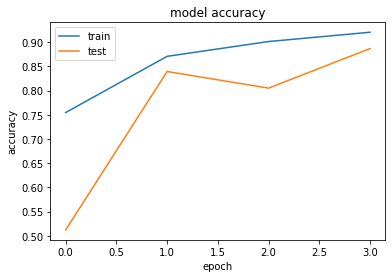

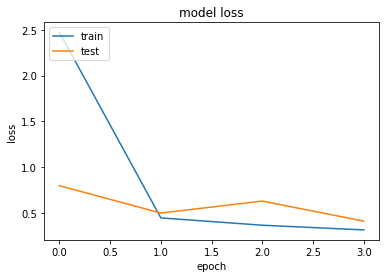

In [181]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

The visuals show a similar performance as the previous model, with a slightly better performance on the loss function with this model. Not completely satisfied with the overall performance, I will attempt again to improve the model through model design and hyperparameter tuning.

In [225]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(120))
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.20))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_69 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 500, 32)           3104      
_________________________________________________________________
batch_normalization_55 (Batc (None, 500, 32)           128       
_________________________________________________________________
dropout_56 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 250, 32)           0         
_________________________________________________________________
lstm_58 (LSTM)               (None, 120)               73440     
_________________________________________________________________
dense_110 (Dense)            (None, 64)              

In this final attempt, I made a couple of alterations to the model to see if it would improve the models performance. The changes made were the change in Dropout layers. I added an additional dropout layer in the model with a value of 0.2. I also changed the position of both dropout layers within the model.

In [226]:
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4, batch_size=64, verbose=2)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/4
391/391 - 29s - loss: 1.5450 - accuracy: 0.7664 - val_loss: 0.6359 - val_accuracy: 0.7178
Epoch 2/4
391/391 - 25s - loss: 0.4098 - accuracy: 0.8771 - val_loss: 0.3945 - val_accuracy: 0.8754
Epoch 3/4
391/391 - 25s - loss: 0.3443 - accuracy: 0.9038 - val_loss: 0.4064 - val_accuracy: 0.8682
Epoch 4/4
391/391 - 25s - loss: 0.3030 - accuracy: 0.9204 - val_loss: 0.3475 - val_accuracy: 0.8955
Accuracy: 89.55%


This final model showed an increase in performance to 89.55%.

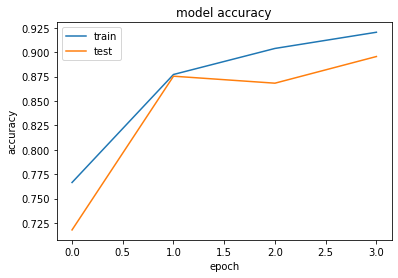

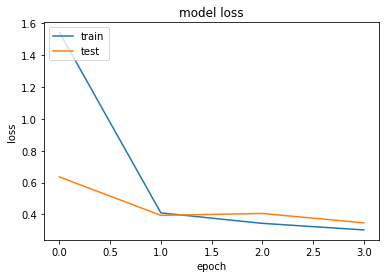

In [227]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

The visuals show that overfitting is much less in this model and can be assumed to be a better (acceptable) model for this text sentiment classification problem. 

# Summary of text classification using ANN, CNN, and CNN + LSTM

In summary, to address the text sentiment classification problem of the IMDB dataset, I tested three types of of neural networks: fully connected neural network, a CNN, and a CNN with LSTM. The CNN with LSTM proved to be the most effective model. This is due to the complimentary properaties that both models provide to sequence classification. The final model had accuracy of 89.55% showing the least overfitting of the data.

# Limitations and future considerations

The following describes various limitations and future considerations regarding the design of the three deep learning models in this assignment. 

**Prepared IMBD dataset used**. (available through Keras). No preprocessing was done on my end. Preprocessing can improve feature design which in turn can improve model performance.

**Embedding**. The pre-trained embedding layer was only applied in the final model (CNN + LSTM), though unsure if it was used correctly. Future considerations should include the pre-trained embedding to make better comparisons between different neural network designs. 

**Hyperparameter tuning**. Manual hyperparameter tuning was cumbersome, but extremely learningful. Grid Search is a more efficient way to find the best parameters for a model and should be applied in future considerations.

**Flatten layer**. A flattening layer was not used in all the CNN. Standard in CNN design flatten layers are used to transform multidimensional input shapes into a single output for classification. I found in various coding books which used 1D CNN + LSTM no usage of flatten layers assuming that 1D does not have to be flattened. In this coding exercise, the flatten layer was left out by design as it gave better results. Future considerations could test other types of CNN for similar problems with a flattening layer.

